In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import pyproj
import folium

In [ ]:
locations = [
[37.4006538448, 127.113002046],
[37.3961840682, 127.112569287],
[37.40189326, 127.105463341],
[37.4053198577, 127.102669308],
[37.4036254954, 127.104548617],
[37.4017604367, 127.105523299],
[37.3984766307, 127.113053349],
[37.3961637419, 127.107699658],
[37.3961849127, 127.112570352],
[37.3961620976, 127.108513558]
]

popup_content = "경로"
popup = folium.Popup(popup_content, max_width=300)

folium.Polygon(
  locations=locations, # 다각형 좌표 입력
  fill_color="skyblue", # 채우기 색상
  fill_opacity=0.5, # 채우기 투명도
  color="blue", # 테두리 색상
  weight=3, # 테두리 두께
  opacity=1, # 테두리 투명도
  popup=popup
).add_to(m)
m

In [ ]:
myMap = folium.Map(location=[37.4729081, 127.039306], zoom_start=12, tiles='CartoDB positron')

[[ 36.39370337 127.3133766 ]
 [ 36.39368787 127.3133887 ]
 [ 36.39366838 127.3134053 ]
 ...
 [ 36.38766497 127.3178975 ]
 [ 36.38781    127.3178383 ]
 [ 36.387662   127.3178996 ]]


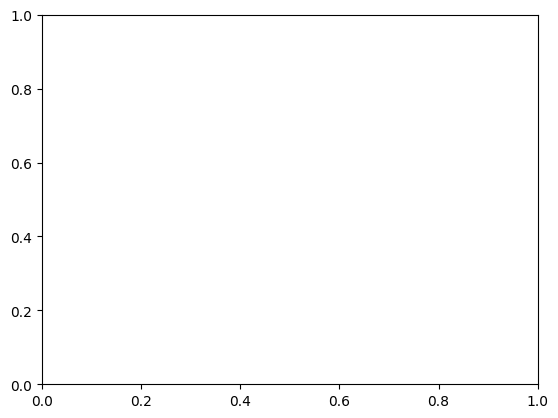

In [ ]:


def project_array(coord, p1_type, p2_type):
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

file_names = ['gps.csv', 'gps2.csv', 'gps3.csv', 'gps4.csv', 'gps5.csv']

dfs = []
for file in file_names:
    dfs.append(pd.read_csv(file, encoding='cp949', usecols=['위도','경도']))

gps = pd.concat(dfs, ignore_index=True)

latitudes = gps['위도']
longitudes = gps['경도']

gps['위도'] = pd.to_numeric(gps['위도'], errors="coerce")
gps['경도'] = pd.to_numeric(gps['경도'], errors="coerce")

coord = np.array(gps)
print(coord)

# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"


# 데이터 100개 랜덤 추출
sample = gps.sample(n=1000)

# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=6)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    folium.Marker(location=[lat, lon]).add_to(m)

m



[[ 36.39370337 127.3133766 ]
 [ 36.39368787 127.3133887 ]
 [ 36.39366838 127.3134053 ]
 ...
 [ 35.0563285  128.9697196 ]
 [ 36.6210775  128.15068   ]
 [ 36.8807903  126.7940747 ]]


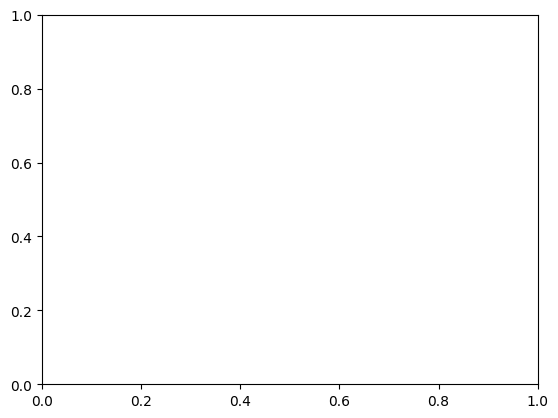

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import pyproj
import folium

def project_array(coord, p1_type, p2_type):
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

file_names = ['gps.csv', '화물운송차량위치정보.csv']

dfs = []
for file in file_names:
    dfs.append(pd.read_csv(file, encoding='cp949', usecols=['위도','경도']))

gps = pd.concat(dfs, ignore_index=True)

fig, ax = plt.subplots()

latitudes = gps['위도']
longitudes = gps['경도']

gps['위도'] = pd.to_numeric(gps['위도'], errors="coerce")
gps['경도'] = pd.to_numeric(gps['경도'], errors="coerce")

coord = np.array(gps)
print(coord)

# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"


# 데이터 100개 랜덤 추출
sample = gps.sample(n=1000)

# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=6)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    folium.Marker(location=[lat, lon]).add_to(m)

m



In [ ]:
import pandas as pd
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import pyproj
import folium

def project_array(coord, p1_type, p2_type):
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

# JSON 파일 읽기
with open("차량GPSINS_nia(2023).json", "r") as f:
    data = json.load(f)

# "la"와 "lo" 값 추출
coordinates = []
for item in data:
    lat = item.get("la")  # "la" 값 추출
    lon = item.get("lo")  # "lo" 값 추출
    coordinates.append({"latitude": lat, "longitude": lon})

# DataFrame 생성
df = pd.DataFrame(coordinates)

# 결과 확인
print(df)

#fig, ax = plt.subplots()

latitudes = df['latitude']
longitudes = df['longitude']

df['위도'] = pd.to_numeric(df['latitude'], errors="coerce")
df['경도'] = pd.to_numeric(df['longitude'], errors="coerce")

coord = np.array(df)
print(coord)

# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"


# 데이터 100개 랜덤 추출
sample = df.sample(n=10)



# 지도 중심 좌표 설정
lat_c, lon_c = 37.53165351203043, 126.9974246490573

# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=6)

# 마커 생성
for _, row in sample.iterrows():
    lat, lon = row['위도'], row['경도']
    print([lat, lon])
    coordinates.append([lat, lon])
    folium.Marker(location=[lat, lon]).add_to(m)

# coordinates를 DataFrame으로 변환
coordinates = []
for item in data:
    lat = item.get("la")  # "la" 값 추출
    lon = item.get("lo")  # "lo" 값 추출
    coordinates.append((lat, lon))  # 리스트나 튜플로 데이터 추가

# DataFrame 생성
df_save = pd.DataFrame(coordinates, columns=['latitude', 'longitude'])

# Excel 파일로 저장
df_save.to_csv('coordinates.csv', index=False)

m

         latitude   longitude
0       37.410790  127.099292
1       37.410790  127.099292
2       37.410789  127.099292
3       37.410789  127.099292
4       37.410788  127.099292
...           ...         ...
151450  37.396161  127.108825
151451  37.396161  127.108825
151452  37.396161  127.108825
151453  37.396161  127.108825
151454  37.396161  127.108825

[151455 rows x 2 columns]
[[ 37.41079049 127.09929165  37.41079049 127.09929165]
 [ 37.41078986 127.09929164  37.41078986 127.09929164]
 [ 37.41078923 127.09929164  37.41078923 127.09929164]
 ...
 [ 37.39616125 127.10882498  37.39616125 127.10882498]
 [ 37.39616125 127.10882498  37.39616125 127.10882498]
 [ 37.39616125 127.10882498  37.39616125 127.10882498]]
[37.4006538448, 127.113002046]
[37.3961840682, 127.112569287]
[37.40189326, 127.105463341]
[37.4053198577, 127.102669308]
[37.4036254954, 127.104548617]
[37.4017604367, 127.105523299]
[37.3984766307, 127.113053349]
[37.3961637419, 127.107699658]
[37.3961849127, 127.112570352]


In [ ]:
import pandas as pd
import numpy as np
import pyproj
import folium

m = folium.Map(location=[37.4079876981, 127.100054638], zoom_start=17)
folium.Marker(
	location=[37.4079876981, 127.0760],
	tooltip="이곳의 이름은?",
	popup="<b>잠실체육관</b>",
	icon=folium.Icon(color="green"),
).add_to(m)
m

In [ ]:
import pandas as pd
import numpy as np
import pyproj
import folium

m = folium.Map(location=[37.3974134251, 127.107031123], zoom_start=17)
folium.Marker(
	location=[37.3974134251, 127.107031123],
	tooltip="이곳의 이름은?",
	popup="<b>test</b>",
	icon=folium.Icon(color="green"),
).add_to(m)
m

In [ ]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('coordinates.csv')

# 중복 제거
df_unique = df.drop_duplicates(subset=['latitude'])
df_unique = df.drop_duplicates(subset=['longitude'])

# 결과 확인
print(df_unique)

         latitude   longitude
0       37.410790  127.099292
1       37.410790  127.099292
2       37.410789  127.099292
3       37.410789  127.099292
4       37.410788  127.099292
...           ...         ...
149895  37.396161  127.108825
149902  37.396161  127.108825
149922  37.396161  127.108825
149929  37.396161  127.108825
149930  37.396161  127.108825

[107640 rows x 2 columns]


In [ ]:
line_coords = [
  (37.4006538448, 127.113002046),
  (37.3961840682, 127.112569287),
  (37.40189326, 127.105463341)
]

folium.PolyLine(
  locations=line_coords, # 선의 위경도 좌표
  color='blue',  # 선 색상
  weight=5,  # 선 굵기
  opacity=0.7,  # 선 투명도
  tooltip="test"
).add_to(m)
m

In [ ]:
locations = [
[37.4006538448, 127.113002046],
[37.3961840682, 127.112569287],
[37.40189326, 127.105463341],
[37.4053198577, 127.102669308],
[37.4036254954, 127.104548617],
[37.4017604367, 127.105523299],
[37.3984766307, 127.113053349],
[37.3961637419, 127.107699658],
[37.3961849127, 127.112570352],
[37.3961620976, 127.108513558]
]
print(locations[1])

[37.3961840682, 127.112569287]


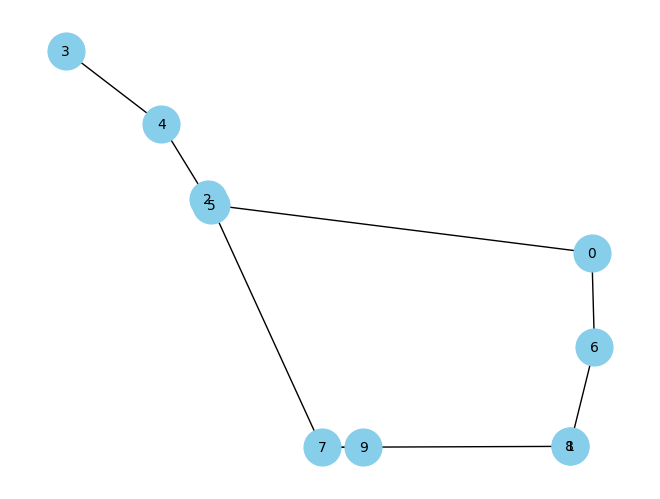

3번 노드에서 9번 노드까지의 최단 경로: [3, 4, 5, 7, 8]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 주어진 좌표 리스트
locations = [
    [37.4006538448, 127.113002046],
    [37.3961840682, 127.112569287],
    [37.40189326, 127.105463341],
    [37.4053198577, 127.102669308],
    [37.4036254954, 127.104548617],
    [37.4017604367, 127.105523299],
    [37.3984766307, 127.113053349],
    [37.3961637419, 127.107699658],
    [37.3961849127, 127.112570352],
    [37.3961620976, 127.108513558]
]

# 빈 그래프 생성
G = nx.Graph()

# 좌표 리스트의 인덱스를 노드로 추가
for i, (lat, lon) in enumerate(locations):
    G.add_node(i, pos=(lon, lat))  # 노드 추가, 위치 정보는 경도와 위도 순서로 지정

# 간선 추가 (주어진 조건에 따라)
G.add_edge(3, 4)  # 3번과 4번 노드 연결
G.add_edge(4, 5)  # 4번과 5번 노드 연결
G.add_edge(5, 7)  # 5번과 7번 노드 연결
G.add_edge(5, 0)  # 5번과 0번 노드 연결
G.add_edge(0, 6)  # 0번과 6번 노드 연결
G.add_edge(7, 9)  # 7번과 9번 노드 연결
G.add_edge(6, 8)
G.add_edge(7, 8)  # 7번과 8번 노드 연결

# 그래프 시각화
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black")
plt.show()

# 최단 경로 찾기
shortest_path = nx.shortest_path(G, source=3, target=8)
print("3번 노드에서 9번 노드까지의 최단 경로:", shortest_path)
